In [1]:
import pandas as pd
import numpy as np

# Load the data
file_path = r"C:\Users\smart\OneDrive - NJIT\Desktop\etf_data_shriya.csv"
data = pd.read_csv(file_path)

In [2]:
data

,Unnamed: 0,ETFG_Date,As_Of_Date,Composite_Ticker,shares_outstanding,nav,fundflow,Risk_Total_Score,Risk_Volatility,Risk_Deviation,...,Quant_Fundamental_Div,Quant_CompositeFundamental,Quant_Global_Sector,Quant_Global_Country,Quant_CompositeGlobal,Quant_Quality_Liquidity,Quant_Quality_Diversification,Quant_Quality_Firm,Quant_Composite_Quality,Quant_Grade
0,0,2018-01-02,2018-01-02,AADR,2875000.0,60.319400,0.0,6.72,5.04,8.41,...,59.6,81.6,50.0,50.0,50.0,73.0,50.0,68.7,63.9,A
1,1,2018-01-02,2018-01-02,AAXJ,64200000.0,77.480000,0.0,4.87,4.68,7.18,...,100.0,51.6,31.5,60.1,45.8,79.8,37.5,99.0,72.1,B
2,2,2018-01-02,2018-01-02,ACIM,1200000.0,79.146100,0.0,3.91,3.90,6.15,...,67.3,16.8,38.1,73.0,55.6,49.8,49.6,98.3,65.9,D
3,3,2018-01-02,2018-01-02,ACSI,1500000.0,30.974600,0.0,3.96,3.38,1.83,...,100.0,62.5,50.0,50.0,50.0,55.0,50.0,15.7,40.2,B
4,4,2018-01-02,2018-01-02,ACT,425000.0,26.578300,3269337.5,6.08,5.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,1136898,2020-03-31,2020-03-31,ZGBR,250000.0,37.115191,0.0,5.26,5.34,7.27,...,50.0,50.0,44.2,79.7,61.9,39.5,39.7,98.3,59.2,C
1136899,1136899,2020-03-31,2020-03-31,ZHOK,125000.0,52.641470,0.0,5.22,4.68,7.08,...,62.5,53.1,24.6,67.6,46.1,32.8,43.8,98.3,58.3,C
1136900,1136900,2020-03-31,2020-03-31,ZIV,2498000.0,32.883085,0.0,7.59,4.34,8.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136901,1136901,2020-03-31,2020-03-31,ZJPN,100000.0,65.736969,0.0,4.23,4.27,6.27,...,62.5,53.1,29.3,91.4,60.4,46.2,45.4,98.3,63.3,C


In [3]:
data['ETFG_Date'] = pd.to_datetime(data['ETFG_Date'])

In [4]:
data['lag_nav']= data.groupby(['Composite_Ticker'])['nav'].shift(1)

In [5]:
data['log_ret'] = np.log(data['nav'])-np.log(data['lag_nav'])

C:\Users\smart\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\smart\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
def positive_D(row):
    if row["fundflow"] >0:
        val = 1
    else:
        val = 0
    return val


def negetive_D(row):
    if row["fundflow"] <0:
        val = 1
    else:
        val = 0
    return val

In [7]:
data['fund_flow_p_dummy'] = data.apply(positive_D, axis=1)

In [8]:
data['fund_flow_N_dummy'] = data.apply(negetive_D, axis=1)

In [9]:
data

,Unnamed: 0,ETFG_Date,As_Of_Date,Composite_Ticker,shares_outstanding,nav,fundflow,Risk_Total_Score,Risk_Volatility,Risk_Deviation,...,Quant_CompositeGlobal,Quant_Quality_Liquidity,Quant_Quality_Diversification,Quant_Quality_Firm,Quant_Composite_Quality,Quant_Grade,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy
0,0,2018-01-02,2018-01-02,AADR,2875000.0,60.319400,0.0,6.72,5.04,8.41,...,50.0,73.0,50.0,68.7,63.9,A,NaN,NaN,0,0
1,1,2018-01-02,2018-01-02,AAXJ,64200000.0,77.480000,0.0,4.87,4.68,7.18,...,45.8,79.8,37.5,99.0,72.1,B,NaN,NaN,0,0
2,2,2018-01-02,2018-01-02,ACIM,1200000.0,79.146100,0.0,3.91,3.90,6.15,...,55.6,49.8,49.6,98.3,65.9,D,NaN,NaN,0,0
3,3,2018-01-02,2018-01-02,ACSI,1500000.0,30.974600,0.0,3.96,3.38,1.83,...,50.0,55.0,50.0,15.7,40.2,B,NaN,NaN,0,0
4,4,2018-01-02,2018-01-02,ACT,425000.0,26.578300,3269337.5,6.08,5.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,1136898,2020-03-31,2020-03-31,ZGBR,250000.0,37.115191,0.0,5.26,5.34,7.27,...,61.9,39.5,39.7,98.3,59.2,C,36.518173,0.016216,0,0
1136899,1136899,2020-03-31,2020-03-31,ZHOK,125000.0,52.641470,0.0,5.22,4.68,7.08,...,46.1,32.8,43.8,98.3,58.3,C,51.411995,0.023633,0,0
1136900,1136900,2020-03-31,2020-03-31,ZIV,2498000.0,32.883085,0.0,7.59,4.34,8.64,...,NaN,NaN,NaN,NaN,NaN,NaN,32.989590,-0.003234,0,0
1136901,1136901,2020-03-31,2020-03-31,ZJPN,100000.0,65.736969,0.0,4.23,4.27,6.27,...,60.4,46.2,45.4,98.3,63.3,C,67.129134,-0.020957,0,0


In [10]:
# Function to create dummy for Grade A
def dummy_A(row):
    return 1 if row["Quant_Grade"] == "A" else 0

# Function to create dummy for Grade B
def dummy_B(row):
    return 1 if row["Quant_Grade"] == "B" else 0

# Function to create dummy for Grade C
def dummy_C(row):
    return 1 if row["Quant_Grade"] == "C" else 0

# Function to create dummy for Grade D
def dummy_D(row):
    return 1 if row["Quant_Grade"] == "D" else 0

# Applying the functions to create dummies
data['DummyA'] = data.apply(dummy_A, axis=1)
data['DummyB'] = data.apply(dummy_B, axis=1)
data['DummyC'] = data.apply(dummy_C, axis=1)
data['DummyD'] = data.apply(dummy_D, axis=1)

# Display the modified DataFrame
print(data)


         Unnamed: 0  ETFG_Date  As_Of_Date Composite_Ticker  \
0                 0 2018-01-02  2018-01-02             AADR   
1                 1 2018-01-02  2018-01-02             AAXJ   
2                 2 2018-01-02  2018-01-02             ACIM   
3                 3 2018-01-02  2018-01-02             ACSI   
4                 4 2018-01-02  2018-01-02              ACT   
...             ...        ...         ...              ...   
1136898     1136898 2020-03-31  2020-03-31             ZGBR   
1136899     1136899 2020-03-31  2020-03-31             ZHOK   
1136900     1136900 2020-03-31  2020-03-31              ZIV   
1136901     1136901 2020-03-31  2020-03-31             ZJPN   
1136902     1136902 2020-03-31  2020-03-31              ZSL   

         shares_outstanding        nav   fundflow  Risk_Total_Score  \
0                 2875000.0  60.319400        0.0              6.72   
1                64200000.0  77.480000        0.0              4.87   
2                 1200000.0  7

In [11]:
data

,Unnamed: 0,ETFG_Date,As_Of_Date,Composite_Ticker,shares_outstanding,nav,fundflow,Risk_Total_Score,Risk_Volatility,Risk_Deviation,...,Quant_Composite_Quality,Quant_Grade,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD
0,0,2018-01-02,2018-01-02,AADR,2875000.0,60.319400,0.0,6.72,5.04,8.41,...,63.9,A,NaN,NaN,0,0,1,0,0,0
1,1,2018-01-02,2018-01-02,AAXJ,64200000.0,77.480000,0.0,4.87,4.68,7.18,...,72.1,B,NaN,NaN,0,0,0,1,0,0
2,2,2018-01-02,2018-01-02,ACIM,1200000.0,79.146100,0.0,3.91,3.90,6.15,...,65.9,D,NaN,NaN,0,0,0,0,0,1
3,3,2018-01-02,2018-01-02,ACSI,1500000.0,30.974600,0.0,3.96,3.38,1.83,...,40.2,B,NaN,NaN,0,0,0,1,0,0
4,4,2018-01-02,2018-01-02,ACT,425000.0,26.578300,3269337.5,6.08,5.00,5.00,...,NaN,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,1136898,2020-03-31,2020-03-31,ZGBR,250000.0,37.115191,0.0,5.26,5.34,7.27,...,59.2,C,36.518173,0.016216,0,0,0,0,1,0
1136899,1136899,2020-03-31,2020-03-31,ZHOK,125000.0,52.641470,0.0,5.22,4.68,7.08,...,58.3,C,51.411995,0.023633,0,0,0,0,1,0
1136900,1136900,2020-03-31,2020-03-31,ZIV,2498000.0,32.883085,0.0,7.59,4.34,8.64,...,NaN,NaN,32.989590,-0.003234,0,0,0,0,0,0
1136901,1136901,2020-03-31,2020-03-31,ZJPN,100000.0,65.736969,0.0,4.23,4.27,6.27,...,63.3,C,67.129134,-0.020957,0,0,0,0,1,0


In [12]:
# Convert the 'ETFG_Date' column to datetime
data['ETFG_Date'] = pd.to_datetime(data['ETFG_Date'])

# Threshold date for comparison
threshold_date = pd.Timestamp('12/22/2019')

# Function to create a dummy variable for dates after 12/22/2019
def dummy_after_threshold_date(row):
    return 1 if row['ETFG_Date'] > threshold_date else 0

# Applying the function to create the dummy
data['Dummy12/22/2019'] = data.apply(dummy_after_threshold_date, axis=1)

# Display the modified DataFrame
print(data)


         Unnamed: 0  ETFG_Date  As_Of_Date Composite_Ticker  \
0                 0 2018-01-02  2018-01-02             AADR   
1                 1 2018-01-02  2018-01-02             AAXJ   
2                 2 2018-01-02  2018-01-02             ACIM   
3                 3 2018-01-02  2018-01-02             ACSI   
4                 4 2018-01-02  2018-01-02              ACT   
...             ...        ...         ...              ...   
1136898     1136898 2020-03-31  2020-03-31             ZGBR   
1136899     1136899 2020-03-31  2020-03-31             ZHOK   
1136900     1136900 2020-03-31  2020-03-31              ZIV   
1136901     1136901 2020-03-31  2020-03-31             ZJPN   
1136902     1136902 2020-03-31  2020-03-31              ZSL   

         shares_outstanding        nav   fundflow  Risk_Total_Score  \
0                 2875000.0  60.319400        0.0              6.72   
1                64200000.0  77.480000        0.0              4.87   
2                 1200000.0  7

In [13]:
data

,Unnamed: 0,ETFG_Date,As_Of_Date,Composite_Ticker,shares_outstanding,nav,fundflow,Risk_Total_Score,Risk_Volatility,Risk_Deviation,...,Quant_Grade,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD,Dummy12/22/2019
0,0,2018-01-02,2018-01-02,AADR,2875000.0,60.319400,0.0,6.72,5.04,8.41,...,A,NaN,NaN,0,0,1,0,0,0,0
1,1,2018-01-02,2018-01-02,AAXJ,64200000.0,77.480000,0.0,4.87,4.68,7.18,...,B,NaN,NaN,0,0,0,1,0,0,0
2,2,2018-01-02,2018-01-02,ACIM,1200000.0,79.146100,0.0,3.91,3.90,6.15,...,D,NaN,NaN,0,0,0,0,0,1,0
3,3,2018-01-02,2018-01-02,ACSI,1500000.0,30.974600,0.0,3.96,3.38,1.83,...,B,NaN,NaN,0,0,0,1,0,0,0
4,4,2018-01-02,2018-01-02,ACT,425000.0,26.578300,3269337.5,6.08,5.00,5.00,...,NaN,NaN,NaN,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,1136898,2020-03-31,2020-03-31,ZGBR,250000.0,37.115191,0.0,5.26,5.34,7.27,...,C,36.518173,0.016216,0,0,0,0,1,0,1
1136899,1136899,2020-03-31,2020-03-31,ZHOK,125000.0,52.641470,0.0,5.22,4.68,7.08,...,C,51.411995,0.023633,0,0,0,0,1,0,1
1136900,1136900,2020-03-31,2020-03-31,ZIV,2498000.0,32.883085,0.0,7.59,4.34,8.64,...,NaN,32.989590,-0.003234,0,0,0,0,0,0,1
1136901,1136901,2020-03-31,2020-03-31,ZJPN,100000.0,65.736969,0.0,4.23,4.27,6.27,...,C,67.129134,-0.020957,0,0,0,0,1,0,1


In [14]:
data_2 = data[['ETFG_Date', 'As_Of_Date', 'Composite_Ticker',
       'shares_outstanding', 'nav', 'fundflow', 'Risk_Total_Score',
       'Risk_Volatility', 'Risk_Deviation', 'Risk_Country', 'Risk_Structure',
       'Risk_Liquidity', 'Risk_Efficiency', 'Reward_Score','lag_nav','log_ret','fund_flow_p_dummy','fund_flow_N_dummy','DummyA','DummyB','DummyC','DummyD','Dummy12/22/2019']]

In [15]:
data_2.isnull().sum()/len(data_2)

ETFG_Date             0.000000
As_Of_Date            0.000000
Composite_Ticker      0.000000
shares_outstanding    0.000000
nav                   0.000105
fundflow              0.000000
Risk_Total_Score      0.001889
Risk_Volatility       0.001889
Risk_Deviation        0.001889
Risk_Country          0.001889
Risk_Structure        0.001889
Risk_Liquidity        0.001889
Risk_Efficiency       0.001889
Reward_Score          0.002039
lag_nav               0.002204
log_ret               0.002311
fund_flow_p_dummy     0.000000
fund_flow_N_dummy     0.000000
DummyA                0.000000
DummyB                0.000000
DummyC                0.000000
DummyD                0.000000
Dummy12/22/2019       0.000000
dtype: float64

In [16]:
data.isnull().sum()/len(data)

Unnamed: 0                       0.000000
ETFG_Date                        0.000000
As_Of_Date                       0.000000
Composite_Ticker                 0.000000
shares_outstanding               0.000000
nav                              0.000105
fundflow                         0.000000
Risk_Total_Score                 0.001889
Risk_Volatility                  0.001889
Risk_Deviation                   0.001889
Risk_Country                     0.001889
Risk_Structure                   0.001889
Risk_Liquidity                   0.001889
Risk_Efficiency                  0.001889
Reward_Score                     0.002039
Quant_Total_Score                0.442645
Quant_Technical_ShortTerm        0.442645
Quant_Technical_Intermediate     0.442645
Quant_Technical_Long             0.442645
Quant_CompositeTechnical         0.442645
Quant_Sentiment_P_C              0.442645
Quant_Sentiment_ShortInterest    0.442645
Quant_Sentiment_ImpliedVol       0.442645
Quant_CompositeSentiment         0

In [17]:
# List of columns to replace null values with 0
columns_to_fill = ['Risk_Total_Score', 'Risk_Volatility', 'Risk_Deviation', 'Risk_Country', 
                   'Risk_Structure', 'Risk_Liquidity', 'Risk_Efficiency']

# Replace null values with 0 in the specified columns
data_2[columns_to_fill] = data_2[columns_to_fill].fillna(0)

# If you want to ensure the changes are made, you can print or view the DataFrame
print(data_2[columns_to_fill].head())


   Risk_Total_Score  Risk_Volatility  Risk_Deviation  Risk_Country  \
0              6.72             5.04            8.41          5.00   
1              4.87             4.68            7.18          3.99   
2              3.91             3.90            6.15          2.70   
3              3.96             3.38            1.83          5.00   
4              6.08             5.00            5.00          5.00   

   Risk_Structure  Risk_Liquidity  Risk_Efficiency  
0            4.04            3.85             7.22  
1            2.62            3.51             5.77  
2            3.04            5.01             3.44  
3            5.81            4.75             5.86  
4            4.04            7.50             6.36  


C:\Users\smart\AppData\Local\Temp\ipykernel_8028\1679736077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[columns_to_fill] = data_2[columns_to_fill].fillna(0)


In [18]:
data_2

,ETFG_Date,As_Of_Date,Composite_Ticker,shares_outstanding,nav,fundflow,Risk_Total_Score,Risk_Volatility,Risk_Deviation,Risk_Country,...,Reward_Score,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD,Dummy12/22/2019
0,2018-01-02,2018-01-02,AADR,2875000.0,60.319400,0.0,6.72,5.04,8.41,5.00,...,8.7931,NaN,NaN,0,0,1,0,0,0,0
1,2018-01-02,2018-01-02,AAXJ,64200000.0,77.480000,0.0,4.87,4.68,7.18,3.99,...,7.0273,NaN,NaN,0,0,0,1,0,0,0
2,2018-01-02,2018-01-02,ACIM,1200000.0,79.146100,0.0,3.91,3.90,6.15,2.70,...,3.0228,NaN,NaN,0,0,0,0,0,1,0
3,2018-01-02,2018-01-02,ACSI,1500000.0,30.974600,0.0,3.96,3.38,1.83,5.00,...,6.7442,NaN,NaN,0,0,0,1,0,0,0
4,2018-01-02,2018-01-02,ACT,425000.0,26.578300,3269337.5,6.08,5.00,5.00,5.00,...,0.0000,NaN,NaN,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,2020-03-31,2020-03-31,ZGBR,250000.0,37.115191,0.0,5.26,5.34,7.27,2.03,...,5.0700,36.518173,0.016216,0,0,0,0,1,0,1
1136899,2020-03-31,2020-03-31,ZHOK,125000.0,52.641470,0.0,5.22,4.68,7.08,3.24,...,4.6400,51.411995,0.023633,0,0,0,0,1,0,1
1136900,2020-03-31,2020-03-31,ZIV,2498000.0,32.883085,0.0,7.59,4.34,8.64,5.00,...,0.0000,32.989590,-0.003234,0,0,0,0,0,0,1
1136901,2020-03-31,2020-03-31,ZJPN,100000.0,65.736969,0.0,4.23,4.27,6.27,0.86,...,5.2900,67.129134,-0.020957,0,0,0,0,1,0,1


In [19]:
data_2.isnull().sum()/len(data_2)

ETFG_Date             0.000000
As_Of_Date            0.000000
Composite_Ticker      0.000000
shares_outstanding    0.000000
nav                   0.000105
fundflow              0.000000
Risk_Total_Score      0.000000
Risk_Volatility       0.000000
Risk_Deviation        0.000000
Risk_Country          0.000000
Risk_Structure        0.000000
Risk_Liquidity        0.000000
Risk_Efficiency       0.000000
Reward_Score          0.002039
lag_nav               0.002204
log_ret               0.002311
fund_flow_p_dummy     0.000000
fund_flow_N_dummy     0.000000
DummyA                0.000000
DummyB                0.000000
DummyC                0.000000
DummyD                0.000000
Dummy12/22/2019       0.000000
dtype: float64

In [21]:
import pandas as pd

# Assuming data_2 is your DataFrame and it already has the columns loaded into it.
columns_to_drop = ['As_Of_Date', 'shares_outstanding', 'nav', 'fundflow', 'Reward_Score']
data_2 = data_2.drop(columns=columns_to_drop)

In [22]:
data_2

,ETFG_Date,Composite_Ticker,Risk_Total_Score,Risk_Volatility,Risk_Deviation,Risk_Country,Risk_Structure,Risk_Liquidity,Risk_Efficiency,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD,Dummy12/22/2019
0,2018-01-02,AADR,6.72,5.04,8.41,5.00,4.04,3.85,7.22,NaN,NaN,0,0,1,0,0,0,0
1,2018-01-02,AAXJ,4.87,4.68,7.18,3.99,2.62,3.51,5.77,NaN,NaN,0,0,0,1,0,0,0
2,2018-01-02,ACIM,3.91,3.90,6.15,2.70,3.04,5.01,3.44,NaN,NaN,0,0,0,0,0,1,0
3,2018-01-02,ACSI,3.96,3.38,1.83,5.00,5.81,4.75,5.86,NaN,NaN,0,0,0,1,0,0,0
4,2018-01-02,ACT,6.08,5.00,5.00,5.00,4.04,7.50,6.36,NaN,NaN,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,2020-03-31,ZGBR,5.26,5.34,7.27,2.03,2.71,5.52,3.03,36.518173,0.016216,0,0,0,0,1,0,1
1136899,2020-03-31,ZHOK,5.22,4.68,7.08,3.24,2.85,5.86,3.04,51.411995,0.023633,0,0,0,0,1,0,1
1136900,2020-03-31,ZIV,7.59,4.34,8.64,5.00,4.50,5.00,7.38,32.989590,-0.003234,0,0,0,0,0,0,1
1136901,2020-03-31,ZJPN,4.23,4.27,6.27,0.86,2.90,5.19,3.03,67.129134,-0.020957,0,0,0,0,1,0,1


In [23]:
import pandas as pd

# Assuming data_2 is already defined and loaded with your data.
data_2 = data_2.dropna()



In [24]:
data_2.isnull().sum()/len(data_2)

ETFG_Date            0.0
Composite_Ticker     0.0
Risk_Total_Score     0.0
Risk_Volatility      0.0
Risk_Deviation       0.0
Risk_Country         0.0
Risk_Structure       0.0
Risk_Liquidity       0.0
Risk_Efficiency      0.0
lag_nav              0.0
log_ret              0.0
fund_flow_p_dummy    0.0
fund_flow_N_dummy    0.0
DummyA               0.0
DummyB               0.0
DummyC               0.0
DummyD               0.0
Dummy12/22/2019      0.0
dtype: float64

In [25]:
# Selecting the features for X using the specific column names
X = data_2[['Risk_Total_Score', 'Risk_Volatility', 'Risk_Deviation', 'Risk_Country',
           'Risk_Structure', 'Risk_Liquidity', 'Risk_Efficiency', 'lag_nav',
           'fund_flow_p_dummy', 'fund_flow_N_dummy', 'DummyA', 'DummyB', 'DummyC', 'DummyD',
           'Dummy12/22/2019']]

# Selecting the target for Y using the column name
Y = data_2['log_ret']

# Display the first few rows of X and Y to verify
print(X.head())
print(Y.head())


      Risk_Total_Score  Risk_Volatility  Risk_Deviation  Risk_Country  \
2043              6.64             4.87            8.41          5.00   
2044              4.89             4.73            7.31          3.99   
2045              4.01             4.03            6.40          2.70   
2046              3.76             3.08            1.76          5.00   
2047              6.03             5.00            5.00          5.00   

      Risk_Structure  Risk_Liquidity  Risk_Efficiency  lag_nav  \
2043            4.04            3.94             7.22  60.3194   
2044            2.62            3.50             5.77  77.4800   
2045            3.04            5.03             3.44  79.1461   
2046            5.81            4.76             5.86  30.9746   
2047            4.04            7.50             6.36  26.5783   

      fund_flow_p_dummy  fund_flow_N_dummy  DummyA  DummyB  DummyC  DummyD  \
2043                  1                  0       1       0       0       0   
2044    

In [26]:
# Removing infinite values from Y
data_2 = data_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_ret'])

# Re-selecting X and Y after cleaning
X = data_2[['Risk_Total_Score', 'Risk_Volatility', 'Risk_Deviation', 'Risk_Country',
           'Risk_Structure', 'Risk_Liquidity', 'Risk_Efficiency', 'lag_nav',
           'fund_flow_p_dummy', 'fund_flow_N_dummy', 'DummyA', 'DummyB', 'DummyC', 'DummyD',
           'Dummy12/22/2019']]
Y = data_2['log_ret']


In [27]:
print(Y.describe())


count    1.134270e+06
mean    -4.619495e-04
std      2.991795e-02
min     -5.323903e+00
25%     -4.344015e-03
50%      2.109223e-04
75%      4.885307e-03
max      5.339189e+00
Name: log_ret, dtype: float64


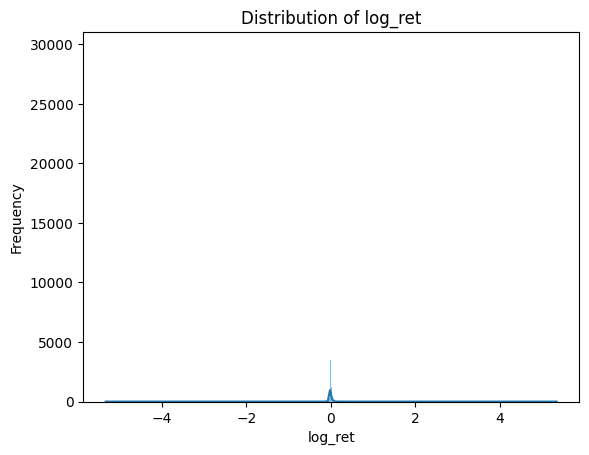

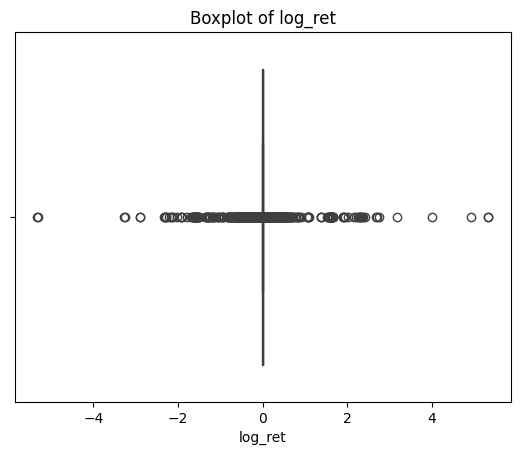

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of log_ret
sns.histplot(Y, kde=True)
plt.title('Distribution of log_ret')
plt.xlabel('log_ret')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers
sns.boxplot(x=Y)
plt.title('Boxplot of log_ret')
plt.xlabel('log_ret')
plt.show()


In [29]:
from scipy.stats.mstats import winsorize

# Winsorizing the data at the 1st and 99th percentiles
Y_winsorized = winsorize(Y, limits=[0.01, 0.01])


In [30]:

import statsmodels.api as sm

# Assuming X is already defined and suitable for use in regression
X = sm.add_constant(X)  # Adding the intercept term if it's not already included

# Creating the OLS model with potentially transformed or cleaned Y
model = sm.OLS(Y_winsorized, X).fit()

# Printing the model summary to review the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     432.1
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        13:43:06   Log-Likelihood:             3.2314e+06
No. Observations:             1134270   AIC:                        -6.463e+06
Df Residuals:                 1134254   BIC:                        -6.463e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0015      0.00

In [31]:
data_2


,ETFG_Date,Composite_Ticker,Risk_Total_Score,Risk_Volatility,Risk_Deviation,Risk_Country,Risk_Structure,Risk_Liquidity,Risk_Efficiency,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD,Dummy12/22/2019
2043,2018-01-03,AADR,6.64,4.87,8.41,5.00,4.04,3.94,7.22,60.319400,0.009088,1,0,1,0,0,0,0
2044,2018-01-03,AAXJ,4.89,4.73,7.31,3.99,2.62,3.50,5.77,77.480000,0.005278,0,0,0,1,0,0,0
2045,2018-01-03,ACIM,4.01,4.03,6.40,2.70,3.04,5.03,3.44,79.146100,0.004167,0,0,0,0,0,1,0
2046,2018-01-03,ACSI,3.76,3.08,1.76,5.00,5.81,4.76,5.86,30.974600,0.002882,0,0,0,1,0,0,0
2047,2018-01-03,ACT,6.03,5.00,5.00,5.00,4.04,7.50,6.36,26.578300,0.007885,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136898,2020-03-31,ZGBR,5.26,5.34,7.27,2.03,2.71,5.52,3.03,36.518173,0.016216,0,0,0,0,1,0,1
1136899,2020-03-31,ZHOK,5.22,4.68,7.08,3.24,2.85,5.86,3.04,51.411995,0.023633,0,0,0,0,1,0,1
1136900,2020-03-31,ZIV,7.59,4.34,8.64,5.00,4.50,5.00,7.38,32.989590,-0.003234,0,0,0,0,0,0,1
1136901,2020-03-31,ZJPN,4.23,4.27,6.27,0.86,2.90,5.19,3.03,67.129134,-0.020957,0,0,0,0,1,0,1


In [32]:
import pandas as pd

# Assuming you have 'data_2' loaded and columns identified for entity and time
data_2['ETFG_Date'] = pd.to_datetime(data_2['ETFG_Date'])  # Ensure ETFG_Date is datetime type
data_2.set_index(['Composite_Ticker', 'ETFG_Date'], inplace=True)  # Setting MultiIndex

# Assuming 'X' and 'Y_winsorized' were defined earlier and need to be re-indexed:
X = data_2[['Risk_Total_Score', 'Risk_Volatility', 'Risk_Deviation', 'Risk_Country',
           'Risk_Structure', 'Risk_Liquidity', 'Risk_Efficiency', 'lag_nav',
           'fund_flow_p_dummy', 'fund_flow_N_dummy', 'DummyA', 'DummyB', 'DummyC', 'DummyD',
           'Dummy12/22/2019']]
X = sm.add_constant(X)  # Ensure there's a constant
Y_winsorized = data_2['log_ret']  # Assuming this is already winsorized as you described

# Check if indices are correctly set
print(X.index)
print(Y_winsorized.index)


MultiIndex([('AADR', '2018-01-03'),
            ('AAXJ', '2018-01-03'),
            ('ACIM', '2018-01-03'),
            ('ACSI', '2018-01-03'),
            ( 'ACT', '2018-01-03'),
            ('ACWF', '2018-01-03'),
            ('ACWI', '2018-01-03'),
            ('ACWV', '2018-01-03'),
            ('ACWX', '2018-01-03'),
            ('ADRA', '2018-01-03'),
            ...
            ( 'YXI', '2020-03-31'),
            ( 'YYY', '2020-03-31'),
            ('ZBIO', '2020-03-31'),
            ('ZCAN', '2020-03-31'),
            ('ZDEU', '2020-03-31'),
            ('ZGBR', '2020-03-31'),
            ('ZHOK', '2020-03-31'),
            ( 'ZIV', '2020-03-31'),
            ('ZJPN', '2020-03-31'),
            ( 'ZSL', '2020-03-31')],
           names=['Composite_Ticker', 'ETFG_Date'], length=1134270)
MultiIndex([('AADR', '2018-01-03'),
            ('AAXJ', '2018-01-03'),
            ('ACIM', '2018-01-03'),
            ('ACSI', '2018-01-03'),
            ( 'ACT', '2018-01-03'),
            ('A

In [34]:
data_2

,,Risk_Total_Score,Risk_Volatility,Risk_Deviation,Risk_Country,Risk_Structure,Risk_Liquidity,Risk_Efficiency,lag_nav,log_ret,fund_flow_p_dummy,fund_flow_N_dummy,DummyA,DummyB,DummyC,DummyD,Dummy12/22/2019
Composite_Ticker,ETFG_Date,,,,,,,,,,,,,,,,
AADR,2018-01-03,6.64,4.87,8.41,5.00,4.04,3.94,7.22,60.319400,0.009088,1,0,1,0,0,0,0
AAXJ,2018-01-03,4.89,4.73,7.31,3.99,2.62,3.50,5.77,77.480000,0.005278,0,0,0,1,0,0,0
ACIM,2018-01-03,4.01,4.03,6.40,2.70,3.04,5.03,3.44,79.146100,0.004167,0,0,0,0,0,1,0
ACSI,2018-01-03,3.76,3.08,1.76,5.00,5.81,4.76,5.86,30.974600,0.002882,0,0,0,1,0,0,0
ACT,2018-01-03,6.03,5.00,5.00,5.00,4.04,7.50,6.36,26.578300,0.007885,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZGBR,2020-03-31,5.26,5.34,7.27,2.03,2.71,5.52,3.03,36.518173,0.016216,0,0,0,0,1,0,1
ZHOK,2020-03-31,5.22,4.68,7.08,3.24,2.85,5.86,3.04,51.411995,0.023633,0,0,0,0,1,0,1
ZIV,2020-03-31,7.59,4.34,8.64,5.00,4.50,5.00,7.38,32.989590,-0.003234,0,0,0,0,0,0,1


In [36]:
# Print the column names
print("Columns:", data_2.columns)

# Print the index names (which should show your MultiIndex)
print("Index:", data_2.index.names)


Columns: Index(['Risk_Total_Score', 'Risk_Volatility', 'Risk_Deviation', 'Risk_Country',
       'Risk_Structure', 'Risk_Liquidity', 'Risk_Efficiency', 'lag_nav',
       'log_ret', 'fund_flow_p_dummy', 'fund_flow_N_dummy', 'DummyA', 'DummyB',
       'DummyC', 'DummyD', 'Dummy12/22/2019'],
      dtype='object')
Index: ['Composite_Ticker', 'ETFG_Date']


In [37]:
from linearmodels.panel import RandomEffects, PanelOLS
import statsmodels.api as sm

# Ensure a constant is added to the DataFrame if not already included
# This step is necessary because OLS models in 'linearmodels' do not automatically include an intercept
if 'const' not in data_2.columns:
    data_2 = sm.add_constant(data_2)

# Panel data models
## Random Effects Model
re_model = RandomEffects(data_2['log_ret'], data_2.drop(columns=['log_ret']))
re_results = re_model.fit()
print('Random Effects Model Results:')
print(re_results)

## Fixed Effects Model
fe_model = PanelOLS(data_2['log_ret'], data_2.drop(columns=['log_ret']), entity_effects=True)
fe_results = fe_model.fit()
print('\nFixed Effects Model Results:')
print(fe_results)


Random Effects Model Results:
                        RandomEffects Estimation Summary                        
Dep. Variable:                log_ret   R-squared:                        0.0484
Estimator:              RandomEffects   R-squared (Between):             -3.7655
No. Observations:             1134270   R-squared (Within):               0.0566
Date:                Sat, May 04 2024   R-squared (Overall):              0.0335
Time:                        13:43:18   Log-likelihood                 2.399e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3844.0
Entities:                        2391   P-value                           0.0000
Avg Obs:                       474.39   Distribution:              F(15,1134254)
Min Obs:                       16.000                                           
Max Obs:                       559.00   F-statistic (robust):             3844.

In [40]:
# Check standard deviations of each variable over time
variable_std = data_2.groupby('ETFG_Date').std()
print(variable_std.describe())


       const  Risk_Total_Score  Risk_Volatility  Risk_Deviation  Risk_Country  \
count  559.0        559.000000       559.000000      559.000000    559.000000   
mean     0.0          1.630712         1.130131        2.422018      2.929851   
std      0.0          0.124282         0.069149        0.123747     17.072381   
min      0.0          0.000000         0.000000        0.000000      0.000000   
25%      0.0          1.589101         1.102433        2.396876      1.597043   
50%      0.0          1.628047         1.131166        2.435776      1.795015   
75%      0.0          1.689275         1.162489        2.462495      1.834653   
max      0.0          2.554663         1.276948        2.509327    273.504779   

       Risk_Structure  Risk_Liquidity  Risk_Efficiency     lag_nav  \
count      559.000000      559.000000       559.000000  559.000000   
mean         1.176502        1.168791         1.880583   39.256605   
std          0.095305        0.130630         0.080762   36.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming all necessary variables are included in 'X' after dropping 'const'
X = data_2_no_const.drop(columns=['log_ret'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


              feature         VIF
0    Risk_Total_Score  118.753069
1     Risk_Volatility   42.355034
2      Risk_Deviation   28.961778
3        Risk_Country    1.133892
4      Risk_Structure   28.109984
5      Risk_Liquidity   33.834496
6     Risk_Efficiency   21.506961
7             lag_nav    2.169537
8   fund_flow_p_dummy    1.207066
9   fund_flow_N_dummy    1.145304
10             DummyA    1.109085
11             DummyB    1.568027
12             DummyC    1.760947
13             DummyD    1.511666
14    Dummy12/22/2019    1.140171
15               year  111.743878


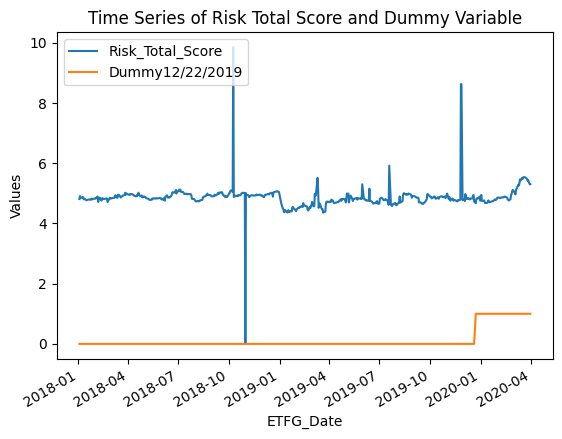

In [46]:
# Diagnose the variability of each variable by plotting or summary statistics
import matplotlib.pyplot as plt

data_2.groupby('ETFG_Date').mean()[['Risk_Total_Score', 'Dummy12/22/2019']].plot()
plt.title('Time Series of Risk Total Score and Dummy Variable')
plt.ylabel('Values')
plt.show()
